## 使用整个数据集预测成绩
数据库系统

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score, median_absolute_error

import scipy

data = pd.read_csv('cs15_22.csv')

#划分训练-测试集，测试集比例为0.25
X_train, X_test, y_train, y_test = train_test_split(data, data['数据库系统'], test_size = 0.25, random_state=42)

In [2]:
import numpy as np
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [3]:
median_pred = X_train['数据库系统'].median()

median_preds = [median_pred for _ in range(len(X_test))]

true = X_test['数据库系统']

In [4]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 28.4242
Median Baseline RMSE: 41.3130


In [5]:
def calculate_rmsea(y_test, predictions):
    # Calculate the root mean square error of approximation (RMSEA)
    residuals = predictions - y_test
    chi_squared = np.sum(residuals ** 2)  # Chi-squared statistic
    degrees_of_freedom = len(y_test)  # Degrees of freedom
    n = len(y_test)  # Number of data points
    rmsea = np.sqrt(chi_squared / (degrees_of_freedom * (n - 1)))
    return rmsea

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted']
    X_train = X_train.drop('数据库系统', axis='columns')
    X_test = X_test.drop('数据库系统', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # # Dataframe for results
    # results = pd.DataFrame(columns=['mae', 'rmse', 'r2', 'rmsea'], index=model_name_list)
    results = pd.DataFrame(columns=['r2', 'rmsea'], index=model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        # mae = median_absolute_error(y_test, predictions)
        # rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        rmsea = calculate_rmsea(y_test, predictions)
        # Insert results into the dataframe
        model_name = model_name_list[i]
        # results.loc[model_name, :] = [mae, rmse, r2, rmsea]
        results.loc[model_name, :] = [r2, rmsea]
    
    # Median Value Baseline Metrics
    # baseline = np.median(y_train)
    # # baseline_mae = np.mean(abs(baseline - y_test))
    # # baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    # baseline_residuals = y_test - baseline
    # baseline_sse = np.sum(baseline_residuals ** 2)
    # y_mean = np.mean(y_test)
    # y_diff = y_test - y_mean
    # sst = np.sum(y_diff ** 2)
    # baseline_r2 = 1 - (baseline_sse / sst)
    # baseline_rmsea = calculate_rmsea(y_test, baseline)
    # # results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2, baseline_rmsea]
    # results.loc['Baseline', :] = [baseline_r2, baseline_rmsea]
    
    return results

In [6]:
results = evaluate(X_train, X_test, y_train, y_test)
print(results)

                             r2     rmsea
Linear Regression      0.948677  0.441141
ElasticNet Regression  0.949051  0.439531
Random Forest          0.957271  0.402515
Extra Trees            0.955621  0.410214
SVM                   -0.255567  2.181933
Gradient Boosted       0.958023  0.398956


## 只使用父节点课程预测成绩
数据库系统
### 父节点课程
* 操作系统原理i
* 操作系统设计专题实验
* 数据库系统
* 编译器设计专题实验
* 计算机系统综合设计实验
* 计算机组成
* 计算机组成与结构专题实验
* 计算机网络专题实验
* 计算机网络原理
* 软件定义网络

In [7]:
data = pd.read_csv('cs15_22_parentsOnly_Compilation.csv')

#划分训练-测试集，测试集比例为0.25
X_train, X_test, y_train, y_test = train_test_split(data, data['数据库系统'], test_size = 0.25, random_state=42)

In [8]:
X_train.head()

,形式语言与编译,操作系统原理i,操作系统设计专题实验,数据库系统,编译器设计专题实验,计算机系统综合设计实验,计算机组成,计算机组成与结构专题实验,计算机网络专题实验,计算机网络原理,软件定义网络
974,66,79,92,68,85,88,79,79,76,82,89
620,0,0,0,0,0,0,0,0,0,0,0
777,60,71,92,62,77,83,63,83,98,69,74
427,78,92,92,86,90,76,85,85,92,96,0
199,80,60,92,76,77,87,76,95,87,69,82


In [9]:
import numpy as np
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [10]:
median_pred = X_train['数据库系统'].median()

median_preds = [median_pred for _ in range(len(X_test))]

true = X_test['数据库系统']

In [11]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 28.2331
Median Baseline RMSE: 41.3544


In [12]:
results2 = evaluate(X_train, X_test, y_train, y_test)
print(results2)

                             r2     rmsea
Linear Regression      0.939757  0.473944
ElasticNet Regression  0.940168  0.472325
Random Forest          0.936141  0.487961
Extra Trees             0.93462  0.493739
SVM                    0.860317  0.721685
Gradient Boosted       0.925647  0.526532


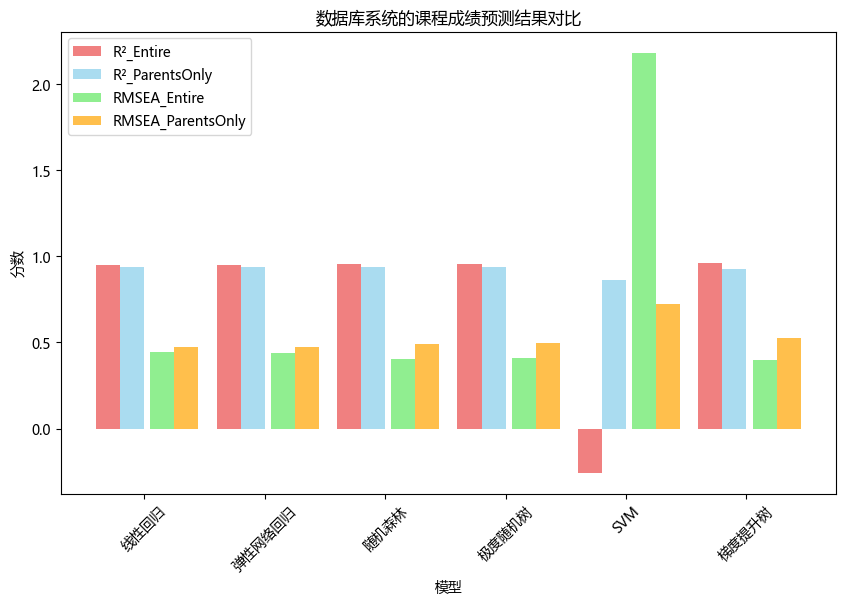

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc("font", family='Microsoft YaHei')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 模型名称和性能指标
# performance_metrics = ["mae", "rmse", "r2", "rmsea"]
model_name_list = ['线性回归', '弹性网络回归',
                      '随机森林', '极度随机树', 'SVM',
                       '梯度提升树']
performance_metrics = ["R²", "RMSEA"]

# 设置图形大小
plt.figure(figsize=(10, 6))

# 设置可视化参数
bar_width = 0.2
index = np.arange(len(model_name_list))

# 绘制R²的柱状图
plt.bar(index - bar_width*1.5, results["r2"], bar_width, label='R²_Entire', color='lightcoral')
plt.bar(index - bar_width*0.5, results2["r2"], bar_width, label='R²_ParentsOnly', color='skyblue', alpha=0.7)

# 绘制RMSEA的柱状图
plt.bar(index + bar_width*0.5+0.05, results["rmsea"], bar_width, label='RMSEA_Entire', color='lightgreen')
plt.bar(index + 1.5 * bar_width+0.05, results2["rmsea"], bar_width, label='RMSEA_ParentsOnly', color='orange', alpha=0.7)

# 设置x轴标签
plt.xlabel('模型')
plt.xticks(index, model_name_list, rotation=45)

# 设置y轴标签
plt.ylabel('分数')

# 设置图例
plt.legend(loc='best')

# 设置标题
plt.title(f"数据库系统的课程成绩预测结果对比", loc='center',)
# 显示图形
plt.show()


In [34]:
# import pygal

# # 创建雷达图对象
# radar_chart = pygal.Radar()
# performance_metrics = ["R²"]

# # 添加数据
# for metric in performance_metrics:
#     radar_chart.add('Group 1', results_group1[:, performance_metrics.index(metric)])
#     radar_chart.add('Group 2', results_group2[:, performance_metrics.index(metric)])

# # 设置雷达图的标题和标签
# radar_chart.title = 'Comparison of Two Experiment Groups'
# radar_chart.x_labels = model_name_list

# # 保存雷达图为文件或显示在屏幕上
# radar_chart.render_to_file('radar_chart.svg')  # 保存为SVG文件